In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [20]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url) #This gives the html of the page

In [21]:
soup = BeautifulSoup(html, 'lxml')
type(soup)


bs4.BeautifulSoup

In [22]:
#To get the title:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [23]:
#To extract ALL hyperlinks within the webpage, denoted by the 'a'.
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><im

In [24]:
#Side note: examples of useful html tags..
#<a> = hyperlinks
#<table> = tables
#<tr> = table rows
#<th> = table headers
#<td> = table cells

In [25]:
#the html tags above have attributes (e.g. class)

all_links = soup.find_all("a") #to print out ONLY hyperlinks,
for link in all_links:         #use this for loop.
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [26]:
#To print out table rows only, pass 'tr' argument..
rows = soup.find_all('tr')
print(rows[:10])           #Prints the first 10 rows

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<

In [27]:
#I will get a table from the webpage and convert it into a dataframe
#to make it easier to manipulate and analyse.


In [28]:
#This iterates through table rows & prints the cells of the rows.
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [13]:
#Each row has html tags embedded in each row,
#Use BeautifulSoup to remove the html tags.

In [32]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


In [39]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
#print(clean2)
#type(clean2)

In [40]:
#Convert the list into a dataframe
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [41]:
#the first row is blank
df.drop([0,4]).head(10)
df.reset_index(inplace=True)

df.drop([0,4]).head(10)

,index,0
1,1,"[Finishers:, 577]"
2,2,"[Male:, 414]"
3,3,"[Female:, 163]"
5,5,"[1, 814, \r\n\r\n JARED WIL..."
6,6,"[2, 573, \r\n\r\n NATHAN A ..."
7,7,"[3, 687, \r\n\r\n FRANCISCO..."
8,8,"[4, 623, \r\n\r\n PAUL MORR..."
9,9,"[5, 569, \r\n\r\n DEREK G O..."
10,10,"[6, 642, \r\n\r\n JONATHON ..."
11,11,"[7, 144, \r\n\r\n GEORGE TO..."


In [ ]:
#Data manipulation and cleaning

#The df needs to be cleaned, I'll split the "0" column into
#multiple ones at the comma.

In [42]:
df1 = df[0].str.split(',', expand=True)

df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [43]:
col_labels = soup.find_all('th') #this will get the table headers

In [44]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [45]:
#Converts the list of headers into pandas dataframe.
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [46]:
#Split column 0 into multiple columns at the comma
df3 = df2[0].str.split(',',expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [47]:
#Concatenate df1 and df3 

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [48]:
#assigns the first row as the table header
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None


In [49]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


In [50]:
df5.shape

(583, 10)

In [51]:
#Drops rows that have all null variables 
df6 = df5.dropna(axis=0, how='any')


In [52]:
#Drops the first row which was replicated when I added the headers
#at the top
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [122]:
#removes the line breaks
df8 = df7.replace(['\r\n','\n'],[' ',''], regex=True)
df8.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,[1,814,JARED WILSON ...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,[3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,PAUL MORROW ...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [123]:
#Data cleaning to rename '[Place' and 'Team]'
df8.rename(columns={'[Place': 'Place'},inplace=True)
df8.rename(columns={' Team]': 'Team'},inplace=True)
df8.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,[1,814,JARED WILSON ...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,[3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,PAUL MORROW ...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [124]:
#Removing the "[" & "]" from those columns
df8['Place'] = df8['Place'].str.strip('[')
df8['Team'] = df8['Team'].str.strip(']')
df8.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON ...,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW ...,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


In [125]:
#Sorting out spacing in the column headers and resetting the index.
df8.columns = df8.columns.str.replace(' ','')
df8.reset_index(drop=True, inplace=True)
df8.head()

,Place,Bib,Name,Gender,City,State,ChipTime,ChipPace,GunTime,Team
0,1,814,JARED WILSON ...,M,TIGARD,OR,36:21,5:51,36:24,
1,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...
2,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,
3,4,623,PAUL MORROW ...,M,BEAVERTON,OR,38:34,6:13,38:37,
4,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...


The DataFrame is now clean

In [136]:
#Adding a mins column for analysis and visualisation
#slicing the minutes only off the chiptime cells
df8['mins'] = df8.ChipTime.str.slice(-5,-3)

df8.head()

,Place,Bib,Name,Gender,City,State,ChipTime,ChipPace,GunTime,Team,mins
0,1,814,JARED WILSON ...,M,TIGARD,OR,36:21,5:51,36:24,,36
1,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ...,36
2,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,6:05,37:48,,37
3,4,623,PAUL MORROW ...,M,BEAVERTON,OR,38:34,6:13,38:37,,38
4,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ...,39


In [146]:
df8['mins'].describe()

count     577
unique     55
top        04
freq       23
Name: mins, dtype: object

C:\Users\neel\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


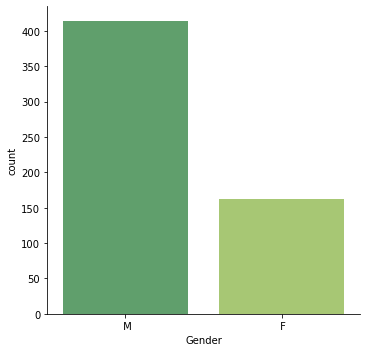

In [126]:
#Counting how many males and females there are
sns.factorplot('Gender',data=df8,kind='count',palette='summer')

In [127]:
df8['Gender'].value_counts()

 M    414
 F    163
Name: Gender, dtype: int64

In [128]:
df8['City'].value_counts()  


 PORTLAND             206
 HILLSBORO            199
 BEAVERTON             85
 NOT SPECIFIED         22
                       17
 TIGARD                13
 OTHER                 10
 ALOHA                  5
 LAKE OSWEGO            4
 FOREST GROVE           3
 OUT OF STATE           3
 TUALATIN               2
 SALT LAKE CITY         1
 EUGENE                 1
 WEST LINN              1
 WINLOCK                1
 20746 SW MABEL ST      1
 ROCKVILLE              1
 BRIDGEWATER            1
 BOISE                  1
Name: City, dtype: int64

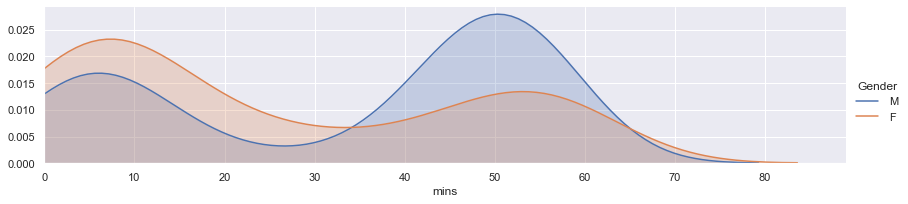

In [170]:
fig = sns.FacetGrid(df8,hue="Gender",aspect=4)

fig.map(sns.kdeplot,'mins',shade=True)

fig.set(xlim=0)
fig.add_legend()

speed distribution by gender.